# Changing Political Orientations in Turkey

"Changing Political Orientations in Turkey" resarch project aims to scale and understand people's changing ideas about different ways of governing Turkey over the last 27 years. I have utilized World Value Survey (WVS) and Konda Barometer datasets. I have used 5 different waves (1996-2018) of WVS and 1 wave (2023) from Konda Barometer.

### Konda and WVS Common Survey Questions

This question serie is common among Konda and WVS dataset: "I'm going to describe various types of political systems and ask what you think about each as a way of governing this country. For each one, would you say it is a very good, fairly good, fairly bad or very bad way of governing this country?"

What do you think about:

1. Having a strong leader who does not have to bother with parliament and election?
2. Having experts, not government, make decisions according to what they think is best for the country?
3. Having the army rule?
4. Having a democratic political system?
5. Having a system governed by religious law in which there are no political parties or elections

In [1]:
import pandas as pd
import seaborn as sns
import os

In [2]:
os.getcwd()

'/Users/abdullahkosgeroglu'

## Datasets Used

I have used / created different datasets for different uses. First reason for that was missing values and answers like Don't know and No Answer, which were all coded as negative numbers in the dataset. I did not want to replace these numbers with different numbers like mean or mode of the dataset, which would lead to create differences in many scales. That's why, I have copied my dataset (data_excluded_cells) and I have excluded the negative numbers in that dataset for some data visulalizations and descriptive statistics. 

Secondly, although WVS and Konda Barometer datasets have some common survey questions, Konda Barometer datasets lacks many of the control variables WVS has. That's why, I could not used an WVS-Konda integrated dataset for my regression analysis. On the other hand, I have used that integrated dataset (consolidated_data) for the visualization of the WVS-Konda common survey questions, which you can find below. 

### Introducing My Main Dataset

In [3]:
data = pd.read_excel('/Users/abdullahkosgeroglu/Desktop/wvs_dataset.xlsx')
data

,importance_politics,feeling_happy,marital_status,interest_politics,political_scale,confidence_government,confidence_political_parties,confidence_parliament,having_strong_leaders,having_experts,having_army_rule,having_democratic_system,religious_group,religiosity,sex,age,employment_status,income_scale,year_survey
0,4,1,1,4,10,1,2,2,1,-1,2,1,5,1,1,3,4,3,1996
1,4,1,1,3,8,1,4,1,4,4,2,4,5,1,2,2,5,2,1996
2,1,1,5,2,10,1,3,1,2,1,1,1,5,1,2,3,4,3,1996
3,3,1,1,4,9,1,3,3,-1,1,2,1,5,2,1,2,1,4,1996
4,3,2,6,2,10,3,3,3,4,2,2,3,5,1,1,1,6,4,1996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10669,4,2,6,4,-2,3,3,3,-1,-1,-5,-1,5,-2,1,1,1,-2,2018
10670,1,2,6,2,10,1,4,2,2,4,-5,2,5,1,1,1,1,5,2018
10671,2,2,5,2,5,3,2,3,2,3,-5,2,5,2,1,3,1,5,2018
10672,1,2,1,4,10,3,2,2,2,2,-5,2,5,1,2,2,7,7,2018


In [4]:
data.head()


,importance_politics,feeling_happy,marital_status,interest_politics,political_scale,confidence_government,confidence_political_parties,confidence_parliament,having_strong_leaders,having_experts,having_army_rule,having_democratic_system,religious_group,religiosity,sex,age,employment_status,income_scale,year_survey
0,4,1,1,4,10,1,2,2,1,-1,2,1,5,1,1,3,4,3,1996
1,4,1,1,3,8,1,4,1,4,4,2,4,5,1,2,2,5,2,1996
2,1,1,5,2,10,1,3,1,2,1,1,1,5,1,2,3,4,3,1996
3,3,1,1,4,9,1,3,3,-1,1,2,1,5,2,1,2,1,4,1996
4,3,2,6,2,10,3,3,3,4,2,2,3,5,1,1,1,6,4,1996


In [5]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10674 entries, 0 to 10673
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   importance_politics           10674 non-null  int64
 1   feeling_happy                 10674 non-null  int64
 2   marital_status                10674 non-null  int64
 3   interest_politics             10674 non-null  int64
 4   political_scale               10674 non-null  int64
 5   confidence_government         10674 non-null  int64
 6   confidence_political_parties  10674 non-null  int64
 7   confidence_parliament         10674 non-null  int64
 8   having_strong_leaders         10674 non-null  int64
 9   having_experts                10674 non-null  int64
 10  having_army_rule              10674 non-null  int64
 11  having_democratic_system      10674 non-null  int64
 12  religious_group               10674 non-null  int64
 13  religiosity                   1

In [6]:
data.describe()

,importance_politics,feeling_happy,marital_status,interest_politics,political_scale,confidence_government,confidence_political_parties,confidence_parliament,having_strong_leaders,having_experts,having_army_rule,having_democratic_system,religious_group,religiosity,sex,age,employment_status,income_scale,year_survey
count,10674.000000,10674.000000,10674.000000,10674.000000,10674.000000,10674.000000,10674.000000,10674.000000,10674.000000,10674.000000,10674.000000,10674.000000,10674.000000,10674.000000,10674.000000,10674.000000,10674.000000,10674.000000,10674.000000
mean,2.558085,1.859846,2.922803,2.620199,5.352726,2.392730,2.773656,2.421491,1.990444,1.893854,0.874461,1.431984,4.699176,0.893948,1.501405,1.845887,3.492505,4.042159,2006.363594
std,1.120597,0.812643,2.387708,1.015586,3.272143,1.172936,1.144696,1.185530,1.441999,1.360756,3.423835,1.013408,1.262548,1.358041,0.500021,0.739427,2.073689,2.368969,7.989030
min,-5.000000,-2.000000,-2.000000,-5.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-5.000000,-2.000000,-5.000000,-5.000000,1.000000,-5.000000,-2.000000,-5.000000,1996.000000
25%,2.000000,1.000000,1.000000,2.000000,4.000000,2.000000,2.000000,2.000000,1.000000,1.000000,-1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2001.000000
50%,3.000000,2.000000,1.000000,3.000000,5.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,5.000000,1.000000,2.000000,2.000000,4.000000,4.000000,2007.000000
75%,3.000000,2.000000,6.000000,3.000000,8.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,2.000000,5.000000,1.000000,2.000000,2.000000,5.000000,6.000000,2012.000000
max,4.000000,4.000000,6.000000,4.000000,10.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,9.000000,3.000000,2.000000,3.000000,8.000000,10.000000,2018.000000


### Creating "data_excluded_cells"

In the WVS dataset, missing values are coded as -5, answers like "don't know" coded as -1 and "no answer" is coded as -2. That's why, the descriptive statistics above reflects all data including these anwers involving negative numbers. However, that might be misleading for descriptive statistics and visualizing the data. That's why I have written codes below. In my initial attempt, the code deleted all rows if it cotains at least one missing value. But in my second attempt which you can see below, the code retains the row and excludes only the relevant cell, which provides better insights.

Intentionally, I did not want to fill the cells with missing value with different values like mean or mode. That would change the distribution, frequency and even the mean of values. Therefore, I have prefered to exclude them.

In [7]:
import numpy as np

missing_values = [-1, -2, -4, -5]

# Create a separate copy of the original DataFrame without modifying the original
data_excluded_cells = data.copy(deep=True)

# Replace designated missing values in each cell with NaN in the copy
for col in data_excluded_cells.columns:
    data_excluded_cells[col] = data_excluded_cells[col].replace(missing_values, np.nan)

# 'data_excluded_cells' is a separate copy with NaN in cells where missing values were designated
data_excluded_cells

,importance_politics,feeling_happy,marital_status,interest_politics,political_scale,confidence_government,confidence_political_parties,confidence_parliament,having_strong_leaders,having_experts,having_army_rule,having_democratic_system,religious_group,religiosity,sex,age,employment_status,income_scale,year_survey
0,4.0,1.0,1.0,4.0,10.0,1.0,2.0,2.0,1.0,NaN,2.0,1.0,5.0,1.0,1,3.0,4.0,3.0,1996
1,4.0,1.0,1.0,3.0,8.0,1.0,4.0,1.0,4.0,4.0,2.0,4.0,5.0,1.0,2,2.0,5.0,2.0,1996
2,1.0,1.0,5.0,2.0,10.0,1.0,3.0,1.0,2.0,1.0,1.0,1.0,5.0,1.0,2,3.0,4.0,3.0,1996
3,3.0,1.0,1.0,4.0,9.0,1.0,3.0,3.0,NaN,1.0,2.0,1.0,5.0,2.0,1,2.0,1.0,4.0,1996
4,3.0,2.0,6.0,2.0,10.0,3.0,3.0,3.0,4.0,2.0,2.0,3.0,5.0,1.0,1,1.0,6.0,4.0,1996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10669,4.0,2.0,6.0,4.0,NaN,3.0,3.0,3.0,NaN,NaN,NaN,NaN,5.0,NaN,1,1.0,1.0,NaN,2018
10670,1.0,2.0,6.0,2.0,10.0,1.0,4.0,2.0,2.0,4.0,NaN,2.0,5.0,1.0,1,1.0,1.0,5.0,2018
10671,2.0,2.0,5.0,2.0,5.0,3.0,2.0,3.0,2.0,3.0,NaN,2.0,5.0,2.0,1,3.0,1.0,5.0,2018
10672,1.0,2.0,1.0,4.0,10.0,3.0,2.0,2.0,2.0,2.0,NaN,2.0,5.0,1.0,2,2.0,7.0,7.0,2018


In [8]:
data_excluded_cells.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10674 entries, 0 to 10673
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   importance_politics           10583 non-null  float64
 1   feeling_happy                 10655 non-null  float64
 2   marital_status                10645 non-null  float64
 3   interest_politics             10590 non-null  float64
 4   political_scale               9757 non-null   float64
 5   confidence_government         10447 non-null  float64
 6   confidence_political_parties  10358 non-null  float64
 7   confidence_parliament         10329 non-null  float64
 8   having_strong_leaders         9470 non-null   float64
 9   having_experts                9451 non-null   float64
 10  having_army_rule              7535 non-null   float64
 11  having_democratic_system      9883 non-null   float64
 12  religious_group               10595 non-null  float64
 13  r

In [9]:
data_excluded_cells.describe()

,importance_politics,feeling_happy,marital_status,interest_politics,political_scale,confidence_government,confidence_political_parties,confidence_parliament,having_strong_leaders,having_experts,having_army_rule,having_democratic_system,religious_group,religiosity,sex,age,employment_status,income_scale,year_survey
count,10583.000000,10655.000000,10645.000000,10590.000000,9757.000000,10447.000000,10358.000000,10329.000000,9470.000000,9451.000000,7535.000000,9883.000000,10595.000000,9877.000000,10674.000000,10655.000000,10544.000000,10278.000000,10674.000000
mean,2.593216,1.865791,2.934429,2.653069,6.010249,2.472002,2.895443,2.543131,2.382999,2.283145,2.947711,1.637256,4.748372,1.233370,1.501405,1.851337,3.552542,4.250049,2006.363594
std,1.057584,0.800793,2.380402,0.948249,2.580460,1.051678,0.918719,0.994419,0.983004,0.869124,0.926944,0.728921,1.130070,0.449008,0.500021,0.727747,2.013539,2.156326,7.989030
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1996.000000
25%,2.000000,1.000000,1.000000,2.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2001.000000
50%,3.000000,2.000000,1.000000,3.000000,6.000000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,2.000000,5.000000,1.000000,2.000000,2.000000,4.000000,4.000000,2007.000000
75%,4.000000,2.000000,6.000000,3.000000,8.000000,3.000000,4.000000,3.000000,3.000000,3.000000,4.000000,2.000000,5.000000,1.000000,2.000000,2.000000,5.000000,6.000000,2012.000000
max,4.000000,4.000000,6.000000,4.000000,10.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,9.000000,3.000000,2.000000,3.000000,8.000000,10.000000,2018.000000


### Introducing My Consolidated Dataset That Includes Both Konda and WVS Data

In [10]:
consolidated_data = pd.read_excel('/Users/abdullahkosgeroglu/Desktop/konda_wvs_consolidated_dataset.xlsx')
consolidated_data

,importance_politics,feeling_happy,marital_status,interest_politics,political_scale,confidence_government,confidence_political_parties,confidence_parliament,having_strong_leaders,having_experts,having_army_rule,having_democratic_system,religious_group,religiosity,sex,age,employment_status,income_scale,year_survey
0,4.0,1.0,1.0,4.0,10.0,1.0,2.0,2.0,1,-1,2,1,5.0,1.0,1,3.0,4.0,3.0,1996
1,4.0,1.0,1.0,3.0,8.0,1.0,4.0,1.0,4,4,2,4,5.0,1.0,2,2.0,5.0,2.0,1996
2,1.0,1.0,5.0,2.0,10.0,1.0,3.0,1.0,2,1,1,1,5.0,1.0,2,3.0,4.0,3.0,1996
3,3.0,1.0,1.0,4.0,9.0,1.0,3.0,3.0,-1,1,2,1,5.0,2.0,1,2.0,1.0,4.0,1996
4,3.0,2.0,6.0,2.0,10.0,3.0,3.0,3.0,4,2,2,3,5.0,1.0,1,1.0,6.0,4.0,1996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13937,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,4,4,NaN,NaN,1,NaN,NaN,NaN,2023
13938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,4,4,4,NaN,NaN,2,NaN,NaN,NaN,2023
13939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3,2,3,NaN,NaN,2,NaN,NaN,NaN,2023
13940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,4,4,2,NaN,NaN,1,NaN,NaN,NaN,2023


In [11]:
consolidated_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13942 entries, 0 to 13941
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   importance_politics           10674 non-null  float64
 1   feeling_happy                 10674 non-null  float64
 2   marital_status                10674 non-null  float64
 3   interest_politics             10674 non-null  float64
 4   political_scale               10674 non-null  float64
 5   confidence_government         10674 non-null  float64
 6   confidence_political_parties  10674 non-null  float64
 7   confidence_parliament         10674 non-null  float64
 8   having_strong_leaders         13942 non-null  int64  
 9   having_experts                13942 non-null  int64  
 10  having_army_rule              13942 non-null  int64  
 11  having_democratic_system      13942 non-null  int64  
 12  religious_group               10674 non-null  float64
 13  r

In [12]:
consolidated_data.describe()

,importance_politics,feeling_happy,marital_status,interest_politics,political_scale,confidence_government,confidence_political_parties,confidence_parliament,having_strong_leaders,having_experts,having_army_rule,having_democratic_system,religious_group,religiosity,sex,age,employment_status,income_scale,year_survey
count,10674.000000,10674.000000,10674.000000,10674.000000,10674.000000,10674.000000,10674.000000,10674.000000,13942.000000,13942.000000,13942.000000,13942.000000,10674.000000,10674.000000,13942.000000,10674.000000,10674.000000,10674.000000,13942.000000
mean,2.558085,1.859846,2.922803,2.620199,5.352726,2.392730,2.773656,2.421491,2.108521,1.930139,1.380361,1.547841,4.699176,0.893948,1.501650,1.845887,3.450909,4.042159,2010.263162
std,1.120597,0.812643,2.387708,1.015586,3.272143,1.172936,1.144696,1.185530,1.466817,1.354257,3.203653,1.118847,1.262548,1.358041,0.507703,0.739427,2.052957,2.368969,9.926469
min,-5.000000,-2.000000,-2.000000,-5.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-5.000000,-2.000000,-5.000000,-5.000000,-2.000000,-5.000000,-2.000000,-5.000000,1996.000000
25%,2.000000,1.000000,1.000000,2.000000,4.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2001.000000
50%,3.000000,2.000000,1.000000,3.000000,5.000000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,2.000000,5.000000,1.000000,2.000000,2.000000,4.000000,4.000000,2012.000000
75%,3.000000,2.000000,6.000000,3.000000,8.000000,3.000000,4.000000,3.000000,3.000000,3.000000,4.000000,2.000000,5.000000,1.000000,2.000000,2.000000,5.000000,6.000000,2018.000000
max,4.000000,4.000000,6.000000,4.000000,10.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,9.000000,3.000000,2.000000,3.000000,8.000000,10.000000,2023.000000


In [13]:
import numpy as np

missing_values = [-1, -2, -4, -5]

# Create a separate copy of the original DataFrame without modifying the original
consolidated_data_excluded_cells = consolidated_data.copy(deep=True)

# Replace designated missing values in each cell with NaN in the copy
for col in consolidated_data_excluded_cells.columns:
    consolidated_data_excluded_cells[col] = consolidated_data_excluded_cells[col].replace(missing_values, np.nan)

# 'data_excluded_cells' is a separate copy with NaN in cells where missing values were designated
consolidated_data_excluded_cells

,importance_politics,feeling_happy,marital_status,interest_politics,political_scale,confidence_government,confidence_political_parties,confidence_parliament,having_strong_leaders,having_experts,having_army_rule,having_democratic_system,religious_group,religiosity,sex,age,employment_status,income_scale,year_survey
0,4.0,1.0,1.0,4.0,10.0,1.0,2.0,2.0,1.0,NaN,2.0,1.0,5.0,1.0,1.0,3.0,4.0,3.0,1996
1,4.0,1.0,1.0,3.0,8.0,1.0,4.0,1.0,4.0,4.0,2.0,4.0,5.0,1.0,2.0,2.0,5.0,2.0,1996
2,1.0,1.0,5.0,2.0,10.0,1.0,3.0,1.0,2.0,1.0,1.0,1.0,5.0,1.0,2.0,3.0,4.0,3.0,1996
3,3.0,1.0,1.0,4.0,9.0,1.0,3.0,3.0,NaN,1.0,2.0,1.0,5.0,2.0,1.0,2.0,1.0,4.0,1996
4,3.0,2.0,6.0,2.0,10.0,3.0,3.0,3.0,4.0,2.0,2.0,3.0,5.0,1.0,1.0,1.0,6.0,4.0,1996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13937,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,4.0,4.0,NaN,NaN,1.0,NaN,NaN,NaN,2023
13938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,4.0,4.0,4.0,NaN,NaN,2.0,NaN,NaN,NaN,2023
13939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3.0,2.0,3.0,NaN,NaN,2.0,NaN,NaN,NaN,2023
13940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0,4.0,2.0,NaN,NaN,1.0,NaN,NaN,NaN,2023


In [14]:
consolidated_data_excluded_cells.describe()

,importance_politics,feeling_happy,marital_status,interest_politics,political_scale,confidence_government,confidence_political_parties,confidence_parliament,having_strong_leaders,having_experts,having_army_rule,having_democratic_system,religious_group,religiosity,sex,age,employment_status,income_scale,year_survey
count,10583.000000,10655.000000,10645.000000,10590.000000,9757.000000,10447.000000,10358.000000,10329.000000,12560.000000,12551.000000,10666.000000,12996.000000,10595.000000,9877.000000,13933.000000,10655.000000,10544.000000,10278.000000,13942.000000
mean,2.593216,1.865791,2.934429,2.653069,6.010249,2.472002,2.895443,2.543131,2.474045,2.279420,3.037315,1.753309,4.748372,1.233370,1.503912,1.851337,3.510432,4.250049,2010.263162
std,1.057584,0.800793,2.380402,0.948249,2.580460,1.051678,0.918719,0.994419,1.010871,0.891799,0.937281,0.840359,1.130070,0.449008,0.500003,0.727747,1.993179,2.156326,9.926469
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1996.000000
25%,2.000000,1.000000,1.000000,2.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2001.000000
50%,3.000000,2.000000,1.000000,3.000000,6.000000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,2.000000,5.000000,1.000000,2.000000,2.000000,4.000000,4.000000,2012.000000
75%,4.000000,2.000000,6.000000,3.000000,8.000000,3.000000,4.000000,3.000000,3.000000,3.000000,4.000000,2.000000,5.000000,1.000000,2.000000,2.000000,5.000000,6.000000,2018.000000
max,4.000000,4.000000,6.000000,4.000000,10.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,9.000000,3.000000,2.000000,3.000000,8.000000,10.000000,2023.000000


## Data Visualisations Over Different Datasets

In [15]:
consolidated_data['having_experts']

0       -1
1        4
2        1
3        1
4        2
        ..
13937    2
13938    4
13939    3
13940    4
13941    2
Name: having_experts, Length: 13942, dtype: int64

In [16]:
consolidated_data_excluded_cells['having_experts']

0        NaN
1        4.0
2        1.0
3        1.0
4        2.0
        ... 
13937    2.0
13938    4.0
13939    3.0
13940    4.0
13941    2.0
Name: having_experts, Length: 13942, dtype: float64

You can see the difference between visualizations made over consolidated_data and consolidated_data_excluded_cells datasets below. Second one does not include the negative numbers, which enables us to better evaluate the results. 

<Axes: >

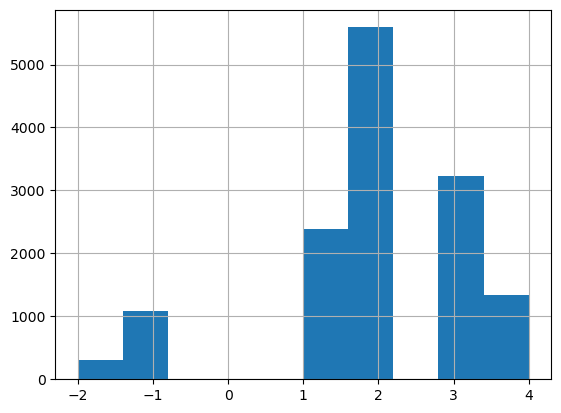

In [17]:
consolidated_data['having_experts'].hist()

<Axes: >

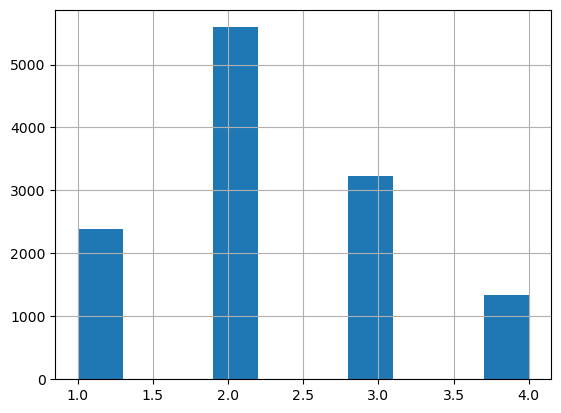

In [18]:
consolidated_data_excluded_cells['having_experts'].hist()

## Konda and WVS Common Survey Questions

This question serie is common among Konda and WVS dataset: "I'm going to describe various types of political systems and ask what you think about each as a way of governing this country. For each one, would you say it is a very good, fairly good, fairly bad or very bad way of governing this country?"

What do you think about:

1. Having a strong leader who does not have to bother with parliament and election?
2. Having experts, not government, make decisions according to what they think is best for the country?
3. Having the army rule?
4. Having a democratic political system?
5. Having a system governed by religious law in which there are no political parties or elections


### 1. What do you think about having a strong leader who does not have to bother with parliament and election?

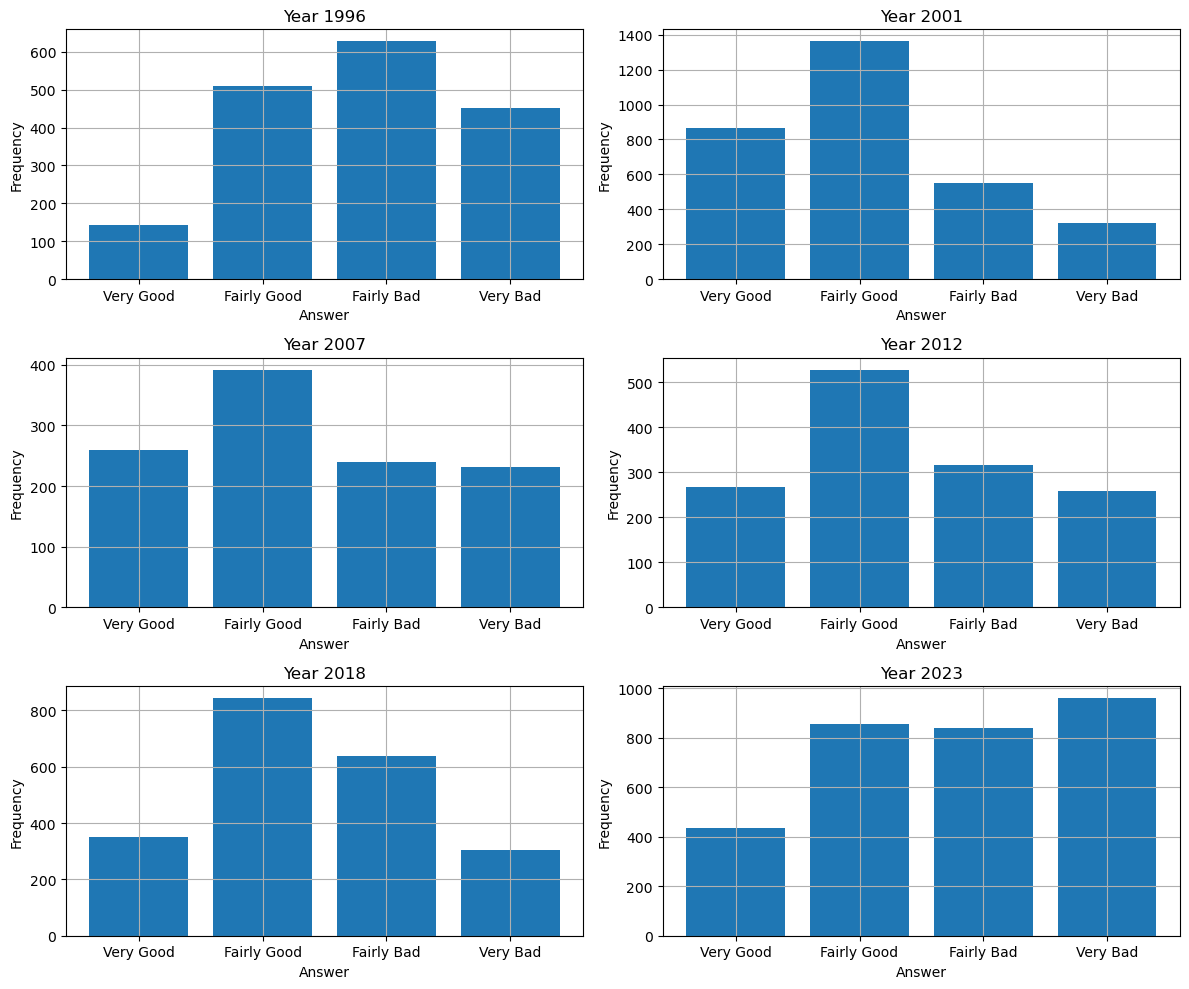

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Grouping the data by year and 'having_strong_leaders' column and counting occurrences of each answer
answer_counts = consolidated_data_excluded_cells.groupby(['year_survey', 'having_strong_leaders']).size().unstack(fill_value=0)

# Determine the number of years in the dataset
num_years = len(answer_counts)

# Calculate the number of rows and columns for subplots
num_rows = (num_years // 2) + (num_years % 2)
num_cols = 2

# Create subplots for each year
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 10))

# Flatten the axs array if it's multidimensional
if num_years > 1:
    axs = axs.flatten()

for i, (year, data) in enumerate(answer_counts.iterrows()):
    ax = axs[i] if num_years > 1 else axs  # Use individual subplot or the only one if there's only one year
    
    ax.bar(data.index, data.values)
    ax.set_title(f'Year {year}')
    ax.set_xlabel('Answer')
    ax.set_ylabel('Frequency')
    ax.set_xticks([1, 2, 3, 4])
    ax.set_xticklabels(['Very Good', 'Fairly Good', 'Fairly Bad', 'Very Bad'])
    ax.grid(True)

# Hide empty subplots
for i in range(num_years, num_rows * num_cols):
    axs[i].axis('off')

plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


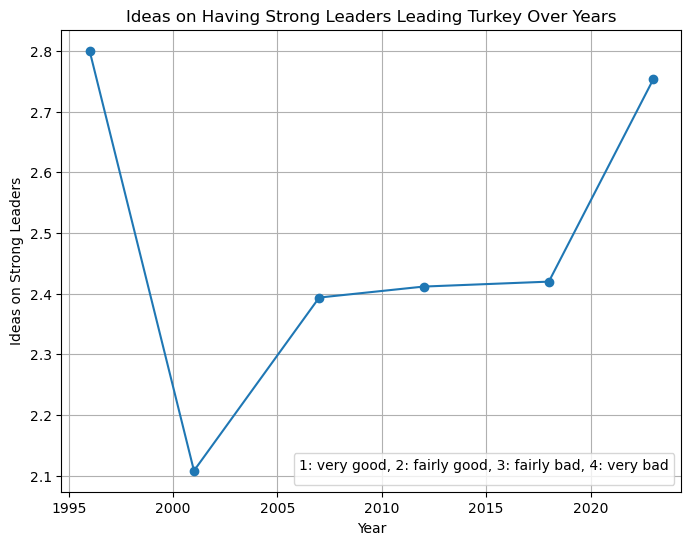

In [20]:
import matplotlib.pyplot as plt

yearly_ideas = consolidated_data_excluded_cells.groupby('year_survey')['having_strong_leaders'].mean()

plt.figure(figsize=(8, 6))
plt.plot(yearly_ideas.index, yearly_ideas.values, marker='o', linestyle='-')

plt.title('Ideas on Having Strong Leaders Leading Turkey Over Years')
plt.xlabel('Year')
plt.ylabel('Ideas on Strong Leaders')
plt.grid(True)
plt.legend(title= "1: very good, 2: fairly good, 3: fairly bad, 4: very bad", 
           loc='lower right')
plt.show()

### 2. What do you think about having experts, not government, make decisions according to what they think is best for the country?

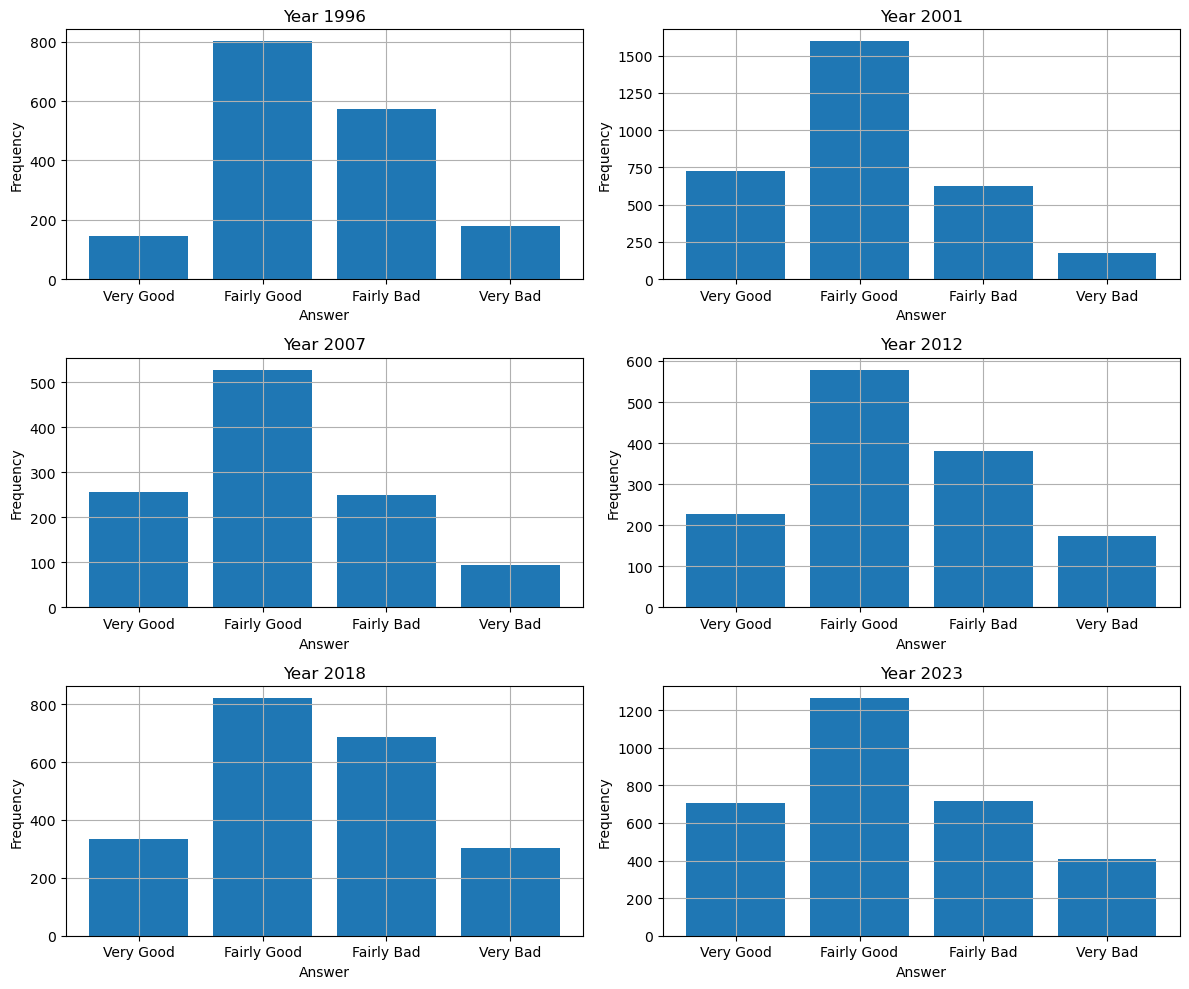

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# Grouping the data by year and 'having_experts' column and counting occurrences of each answer
answer_counts = consolidated_data_excluded_cells.groupby(['year_survey', 'having_experts']).size().unstack(fill_value=0)

# Determine the number of years in the dataset
num_years = len(answer_counts)

# Calculate the number of rows and columns for subplots
num_rows = (num_years // 2) + (num_years % 2)
num_cols = 2

# Create subplots for each year
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 10))

# Flatten the axs array if it's multidimensional
if num_years > 1:
    axs = axs.flatten()

for i, (year, data) in enumerate(answer_counts.iterrows()):
    ax = axs[i] if num_years > 1 else axs  # Use individual subplot or the only one if there's only one year
    
    ax.bar(data.index, data.values)
    ax.set_title(f'Year {year}')
    ax.set_xlabel('Answer')
    ax.set_ylabel('Frequency')
    ax.set_xticks([1, 2, 3, 4])
    ax.set_xticklabels(['Very Good', 'Fairly Good', 'Fairly Bad', 'Very Bad'])
    ax.grid(True)

# Hide empty subplots
for i in range(num_years, num_rows * num_cols):
    axs[i].axis('off')

plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


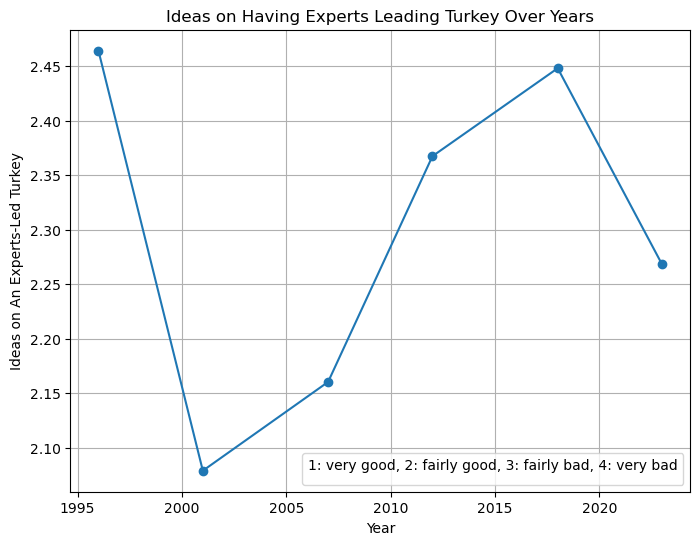

In [22]:
import matplotlib.pyplot as plt

yearly_ideas = consolidated_data_excluded_cells.groupby('year_survey')['having_experts'].mean()

plt.figure(figsize=(8, 6))
plt.plot(yearly_ideas.index, yearly_ideas.values, marker='o', linestyle='-')

plt.title('Ideas on Having Experts Leading Turkey Over Years')
plt.xlabel('Year')
plt.ylabel('Ideas on An Experts-Led Turkey')
plt.grid(True)
plt.legend(title= "1: very good, 2: fairly good, 3: fairly bad, 4: very bad", 
           loc='lower right')
plt.show()


### 3. What do you think about having the army rule for governing Turkey?

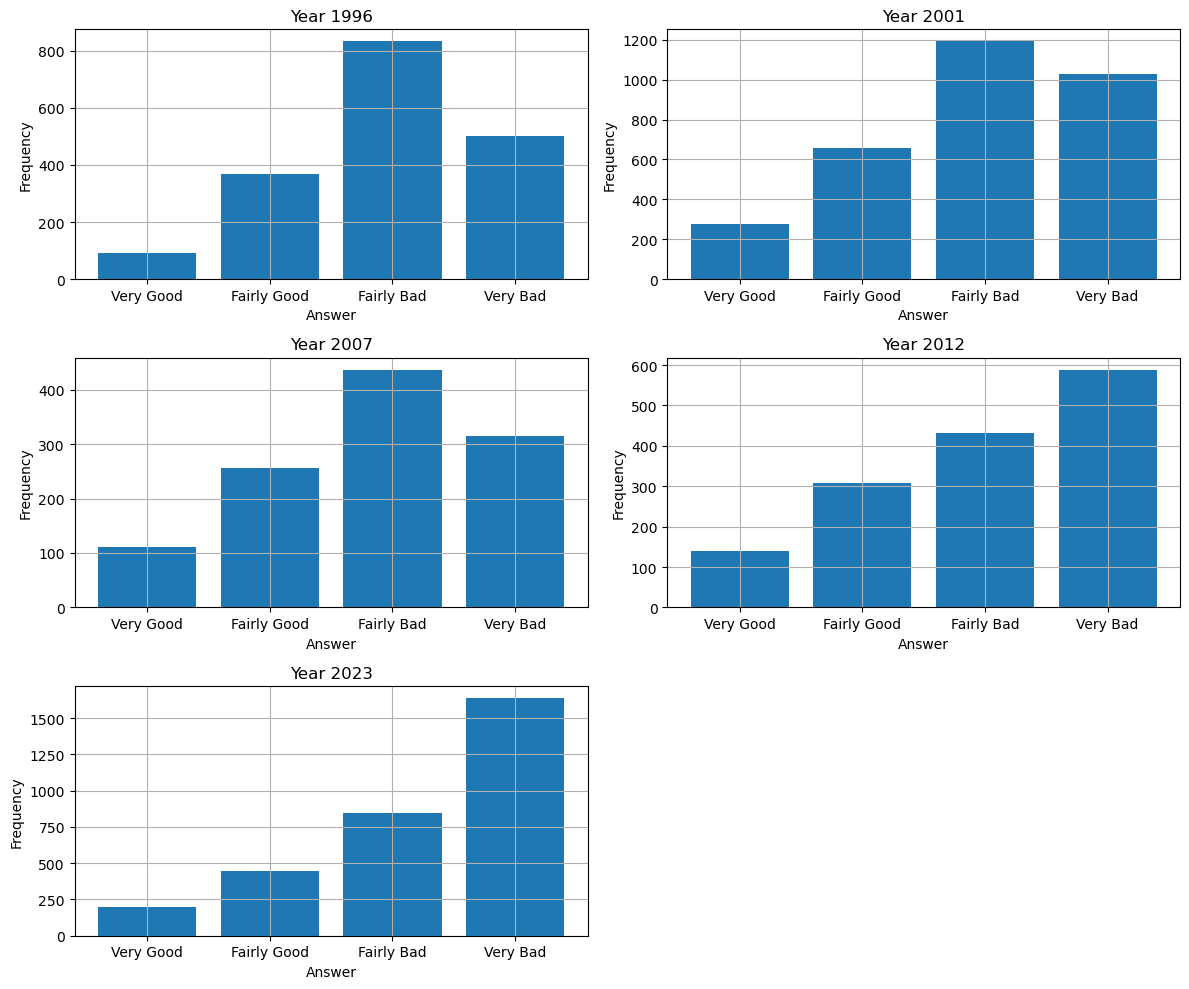

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

# Grouping the data by year and 'having_army_rule' column and counting occurrences of each answer
answer_counts = consolidated_data_excluded_cells.groupby(['year_survey', 'having_army_rule']).size().unstack(fill_value=0)

# Determine the number of years in the dataset
num_years = len(answer_counts)

# Calculate the number of rows and columns for subplots
num_rows = (num_years // 2) + (num_years % 2)
num_cols = 2

# Create subplots for each year
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 10))

# Flatten the axs array if it's multidimensional
if num_years > 1:
    axs = axs.flatten()

for i, (year, data) in enumerate(answer_counts.iterrows()):
    ax = axs[i] if num_years > 1 else axs  # Use individual subplot or the only one if there's only one year
    
    ax.bar(data.index, data.values)
    ax.set_title(f'Year {year}')
    ax.set_xlabel('Answer')
    ax.set_ylabel('Frequency')
    ax.set_xticks([1, 2, 3, 4])
    ax.set_xticklabels(['Very Good', 'Fairly Good', 'Fairly Bad', 'Very Bad'])
    ax.grid(True)

# Hide empty subplots
for i in range(num_years, num_rows * num_cols):
    axs[i].axis('off')

plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


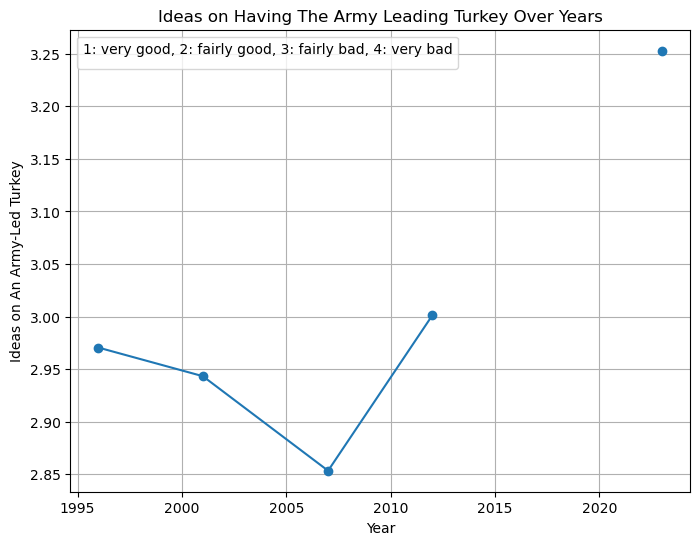

In [24]:
import matplotlib.pyplot as plt

yearly_ideas = consolidated_data_excluded_cells.groupby('year_survey')['having_army_rule'].mean()

plt.figure(figsize=(8, 6))
plt.plot(yearly_ideas.index, yearly_ideas.values, marker='o', linestyle='-')

plt.title('Ideas on Having The Army Leading Turkey Over Years')
plt.xlabel('Year')
plt.ylabel('Ideas on An Army-Led Turkey')
plt.grid(True)
plt.legend(title= "1: very good, 2: fairly good, 3: fairly bad, 4: very bad", 
           loc='upper left')
plt.show()

Explanation: In the Wave 7 of the World Value Survey conducted in 2017, all answers to the question on having army leading Turkey seems missing. That's why it is absent in the plot above. The coup attempt occurred in 2016 might caused the researchers to abstain from asking this question.

### 4. What do you think about having a democratic political system?

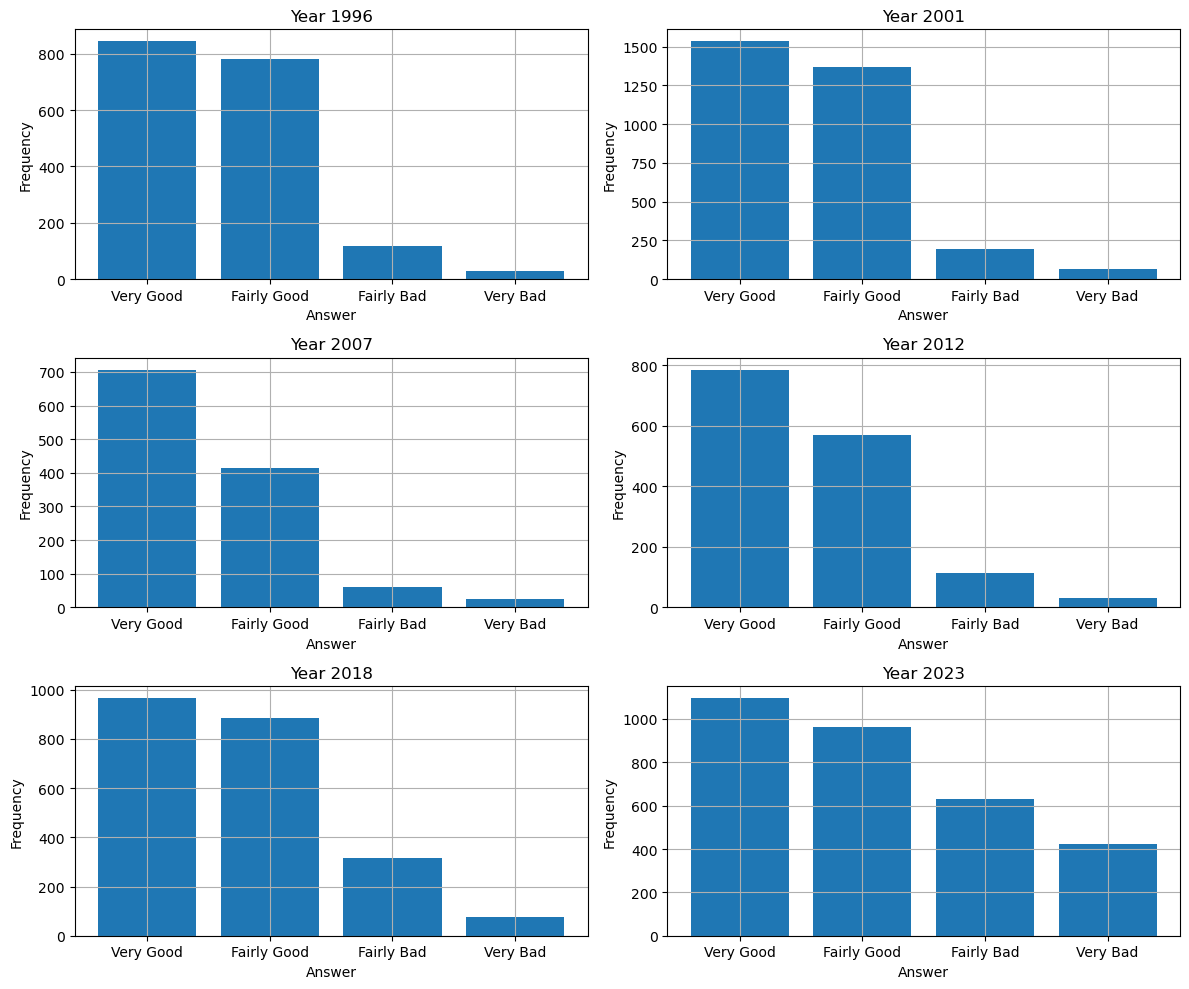

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Grouping the data by year and 'having_democratic_system' column and counting occurrences of each answer
answer_counts = consolidated_data_excluded_cells.groupby(['year_survey', 'having_democratic_system']).size().unstack(fill_value=0)

# Determine the number of years in the dataset
num_years = len(answer_counts)

# Calculate the number of rows and columns for subplots
num_rows = (num_years // 2) + (num_years % 2)
num_cols = 2

# Create subplots for each year
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 10))

# Flatten the axs array if it's multidimensional
if num_years > 1:
    axs = axs.flatten()

for i, (year, data) in enumerate(answer_counts.iterrows()):
    ax = axs[i] if num_years > 1 else axs  # Use individual subplot or the only one if there's only one year
    
    ax.bar(data.index, data.values)
    ax.set_title(f'Year {year}')
    ax.set_xlabel('Answer')
    ax.set_ylabel('Frequency')
    ax.set_xticks([1, 2, 3, 4])
    ax.set_xticklabels(['Very Good', 'Fairly Good', 'Fairly Bad', 'Very Bad'])
    ax.grid(True)

# Hide empty subplots
for i in range(num_years, num_rows * num_cols):
    axs[i].axis('off')

plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


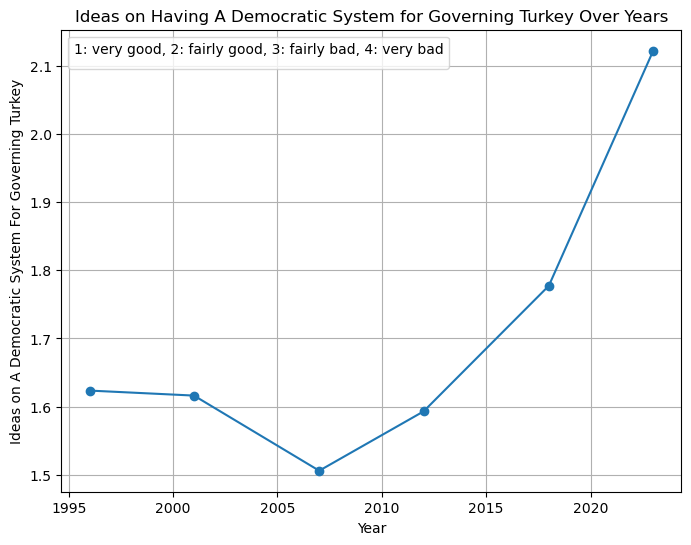

In [26]:
import matplotlib.pyplot as plt

yearly_ideas = consolidated_data_excluded_cells.groupby('year_survey')['having_democratic_system'].mean()

plt.figure(figsize=(8, 6))
plt.plot(yearly_ideas.index, yearly_ideas.values, marker='o', linestyle='-')

plt.title('Ideas on Having A Democratic System for Governing Turkey Over Years')
plt.xlabel('Year')
plt.ylabel('Ideas on A Democratic System For Governing Turkey')
plt.grid(True)
plt.legend(title= "1: very good, 2: fairly good, 3: fairly bad, 4: very bad", 
           loc='upper left')
plt.show()

### 5. What do you think about having a system governed by religious law in which there are no political parties or elections?

EXPLANATION: Since this question is asked only in 2018 (WVS) and 2023 (Konda), I have created a separate dataset for it. 

In [27]:
data_religious_rule = pd.read_excel('/Users/abdullahkosgeroglu/Desktop/dataset_religious_rule.xlsx')
data_religious_rule

,having_strong_leaders,having_experts,having_army_rule,having_democratic_system,having_religious_rule,year_survey,sex
0,2,1,-5,2,4,2018,2
1,2,3,-5,-1,3,2018,1
2,1,4,-5,1,4,2018,1
3,1,2,-5,1,1,2018,2
4,3,3,-5,2,4,2018,2
...,...,...,...,...,...,...,...
5678,1,2,4,4,2,2023,1
5679,2,4,4,4,1,2023,2
5680,2,3,2,3,3,2023,2
5681,1,4,4,2,4,2023,1


In [28]:
import numpy as np

missing_values = [-1, -2, -4, -5]

# Create a separate copy of the original DataFrame without modifying the original
data_religious_rule_excluded_cells = data_religious_rule.copy(deep=True)

# Replace designated missing values in each cell with NaN in the copy
for col in data_religious_rule_excluded_cells.columns:
    data_religious_rule_excluded_cells[col] = data_religious_rule_excluded_cells[col].replace(missing_values, np.nan)

# 'data_religious_rule_excluded_cells' is a separate copy with NaN in cells where missing values were designated
data_religious_rule_excluded_cells

,having_strong_leaders,having_experts,having_army_rule,having_democratic_system,having_religious_rule,year_survey,sex
0,2.0,1.0,NaN,2.0,4.0,2018,2.0
1,2.0,3.0,NaN,NaN,3.0,2018,1.0
2,1.0,4.0,NaN,1.0,4.0,2018,1.0
3,1.0,2.0,NaN,1.0,1.0,2018,2.0
4,3.0,3.0,NaN,2.0,4.0,2018,2.0
...,...,...,...,...,...,...,...
5678,1.0,2.0,4.0,4.0,2.0,2023,1.0
5679,2.0,4.0,4.0,4.0,1.0,2023,2.0
5680,2.0,3.0,2.0,3.0,3.0,2023,2.0
5681,1.0,4.0,4.0,2.0,4.0,2023,1.0


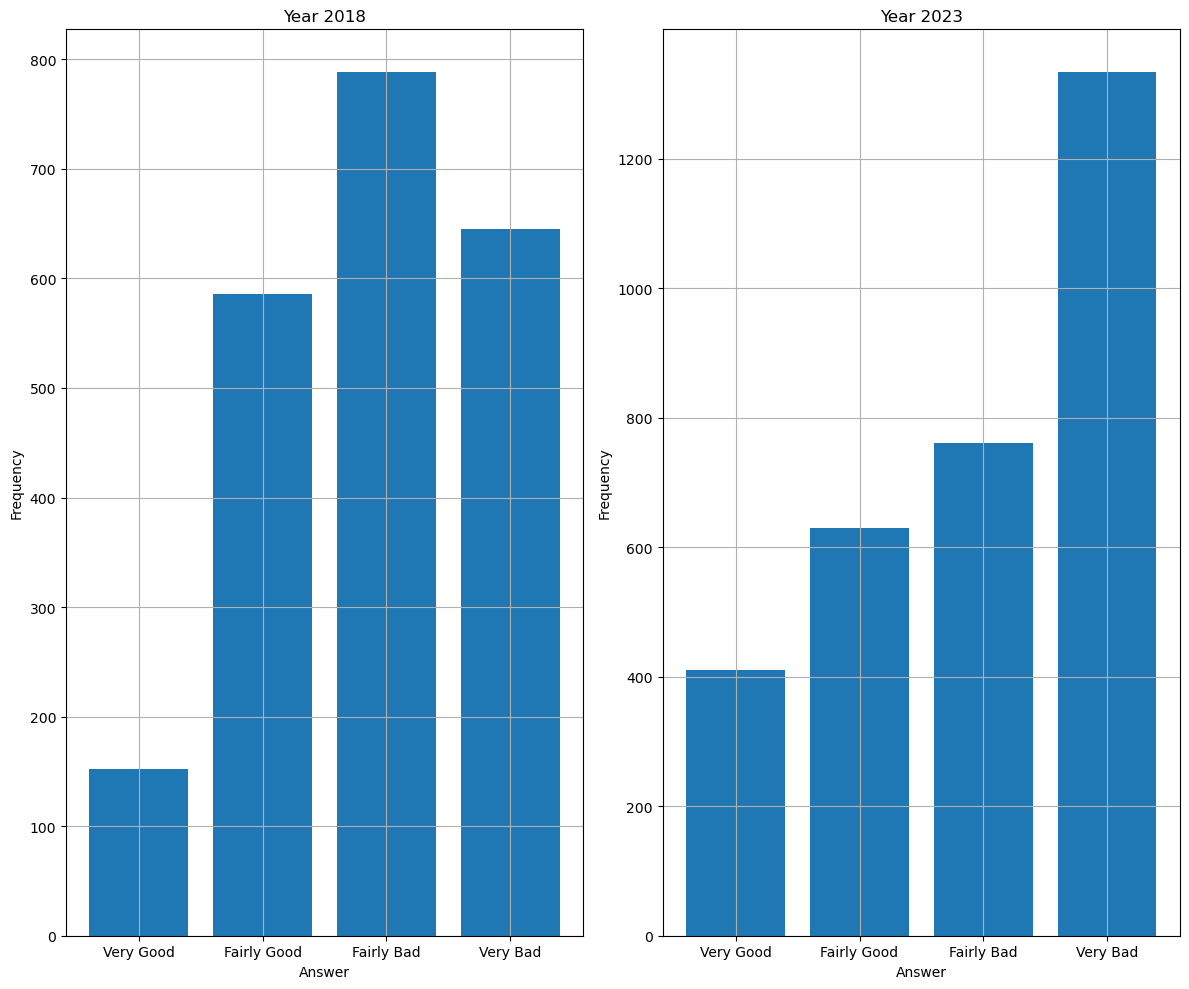

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

# Grouping the data by year and 'having_democratic_system' column and counting occurrences of each answer
answer_counts = data_religious_rule_excluded_cells.groupby(['year_survey', 'having_religious_rule']).size().unstack(fill_value=0)

# Determine the number of years in the dataset
num_years = len(answer_counts)

# Calculate the number of rows and columns for subplots
num_rows = (num_years // 2) + (num_years % 2)
num_cols = 2

# Create subplots for each year
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 10))

# Flatten the axs array if it's multidimensional
if num_years > 1:
    axs = axs.flatten()

for i, (year, data) in enumerate(answer_counts.iterrows()):
    ax = axs[i] if num_years > 1 else axs  # Use individual subplot or the only one if there's only one year
    
    ax.bar(data.index, data.values)
    ax.set_title(f'Year {year}')
    ax.set_xlabel('Answer')
    ax.set_ylabel('Frequency')
    ax.set_xticks([1, 2, 3, 4])
    ax.set_xticklabels(['Very Good', 'Fairly Good', 'Fairly Bad', 'Very Bad'])
    ax.grid(True)

# Hide empty subplots
for i in range(num_years, num_rows * num_cols):
    axs[i].axis('off')

plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


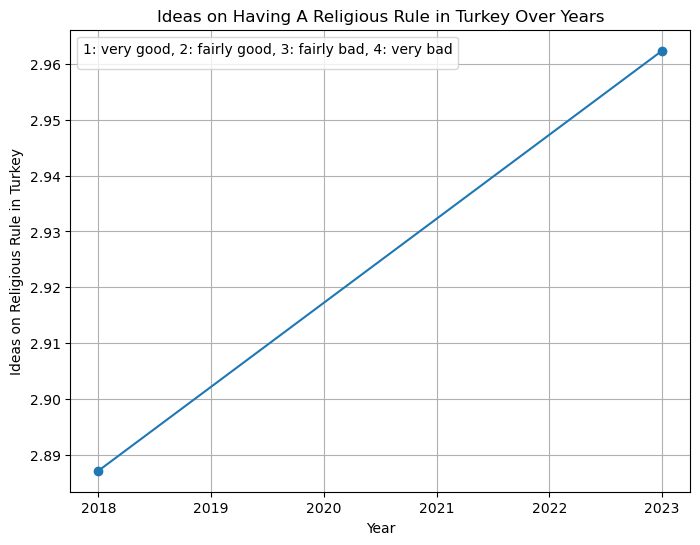

In [30]:
import matplotlib.pyplot as plt

yearly_ideas = data_religious_rule_excluded_cells.groupby('year_survey')['having_religious_rule'].mean()

plt.figure(figsize=(8, 6))
plt.plot(yearly_ideas.index, yearly_ideas.values, marker='o', linestyle='-')

plt.title('Ideas on Having A Religious Rule in Turkey Over Years')
plt.xlabel('Year')
plt.ylabel('Ideas on Religious Rule in Turkey')
plt.grid(True)
plt.legend(title= "1: very good, 2: fairly good, 3: fairly bad, 4: very bad", 
           loc='upper left')
plt.show()

EXPLANATION: Since this question is asked only in 2018 (WVS) and 2023 (Konda), I have created a separate dataset for it. 

### Other Survey Questions That Might Effect The Ideas On Political Systems

### An Example Demonstrating the Difference Between the Use of "data" and "data_excluded_cells" Datasets

In [31]:
data = pd.read_excel('/Users/abdullahkosgeroglu/Desktop/wvs_dataset.xlsx')
data

,importance_politics,feeling_happy,marital_status,interest_politics,political_scale,confidence_government,confidence_political_parties,confidence_parliament,having_strong_leaders,having_experts,having_army_rule,having_democratic_system,religious_group,religiosity,sex,age,employment_status,income_scale,year_survey
0,4,1,1,4,10,1,2,2,1,-1,2,1,5,1,1,3,4,3,1996
1,4,1,1,3,8,1,4,1,4,4,2,4,5,1,2,2,5,2,1996
2,1,1,5,2,10,1,3,1,2,1,1,1,5,1,2,3,4,3,1996
3,3,1,1,4,9,1,3,3,-1,1,2,1,5,2,1,2,1,4,1996
4,3,2,6,2,10,3,3,3,4,2,2,3,5,1,1,1,6,4,1996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10669,4,2,6,4,-2,3,3,3,-1,-1,-5,-1,5,-2,1,1,1,-2,2018
10670,1,2,6,2,10,1,4,2,2,4,-5,2,5,1,1,1,1,5,2018
10671,2,2,5,2,5,3,2,3,2,3,-5,2,5,2,1,3,1,5,2018
10672,1,2,1,4,10,3,2,2,2,2,-5,2,5,1,2,2,7,7,2018


In [32]:
data['religiosity']

0        1
1        1
2        1
3        2
4        1
        ..
10669   -2
10670    1
10671    2
10672    1
10673    2
Name: religiosity, Length: 10674, dtype: int64

<Axes: >

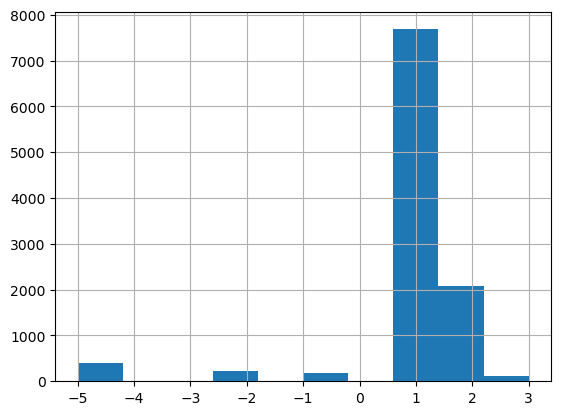

In [33]:
data['religiosity'].hist()

<Axes: >

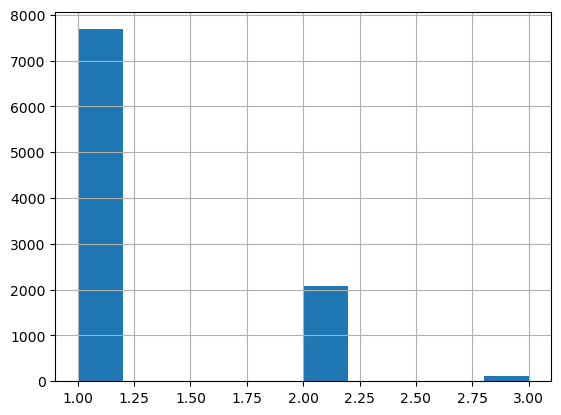

In [34]:
data_excluded_cells['religiosity'].hist()

## Plots

#### Religiosity

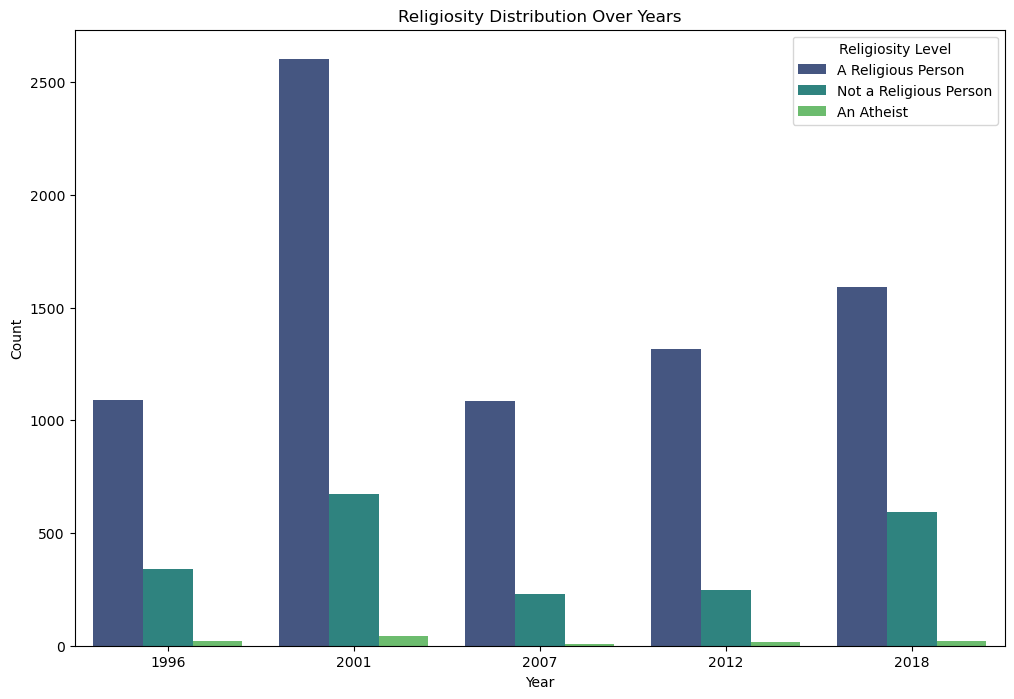

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

data_excluded_cells['religiosity'] = data_excluded_cells['religiosity'].astype('category')

plt.figure(figsize=(12, 8))
sns.countplot(x='year_survey', hue='religiosity', data=data_excluded_cells, palette='viridis')

plt.title('Religiosity Distribution Over Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Religiosity Level', labels=['A Religious Person', 'Not a Religious Person', 'An Atheist'])
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


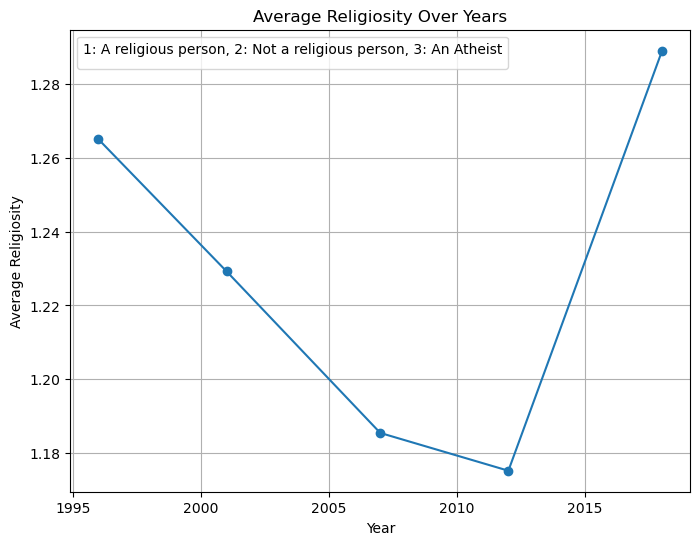

In [40]:
import matplotlib.pyplot as plt

# Convert 'religiosity' column to numeric
data_excluded_cells['religiosity'] = pd.to_numeric(data_excluded_cells['religiosity'], errors='coerce')

# Group by 'year_survey' and calculate the mean
yearly_religiosity = data_excluded_cells.groupby('year_survey')['religiosity'].mean()

plt.figure(figsize=(8, 6))
plt.plot(yearly_religiosity.index, yearly_religiosity.values, marker='o', linestyle='-')

plt.title('Average Religiosity Over Years')
plt.xlabel('Year')
plt.ylabel('Average Religiosity')
plt.grid(True)
plt.legend(title='1: A religious person, 2: Not a religious person, 3: An Atheist', loc='upper left')
plt.show()


#### Political Orientation

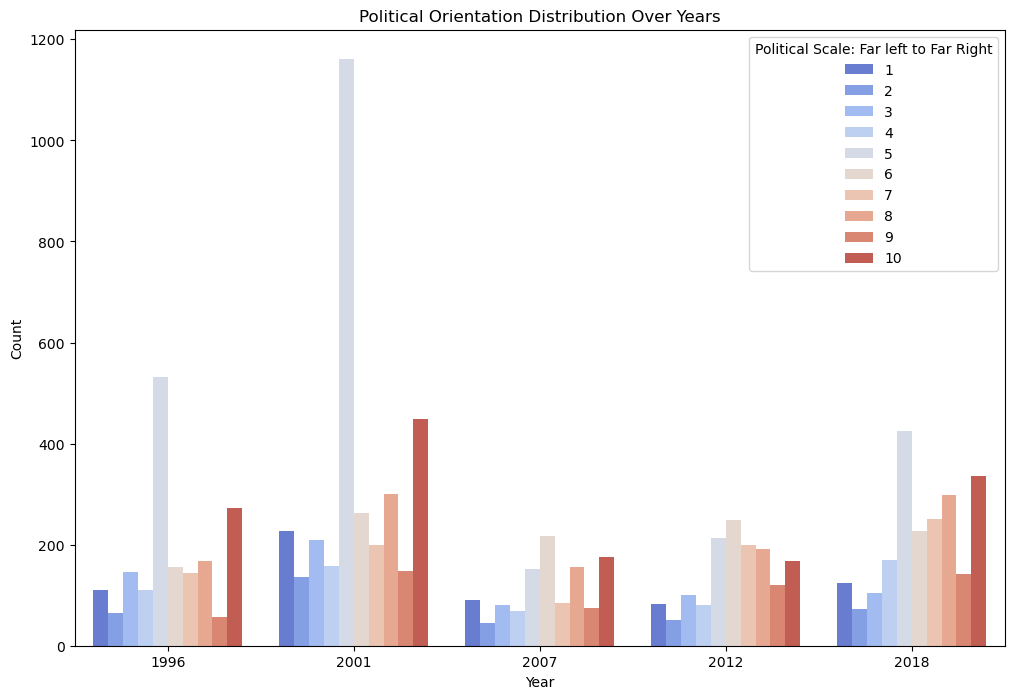

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

data_excluded_cells['political_scale'] = data_excluded_cells['political_scale'].astype('category')

plt.figure(figsize=(12, 8))
sns.countplot(x='year_survey', hue='political_scale', data=data_excluded_cells, palette='coolwarm')

plt.title('Political Orientation Distribution Over Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Political Scale: Far left to Far Right', labels=[str(i) for i in range(1, 11)])
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


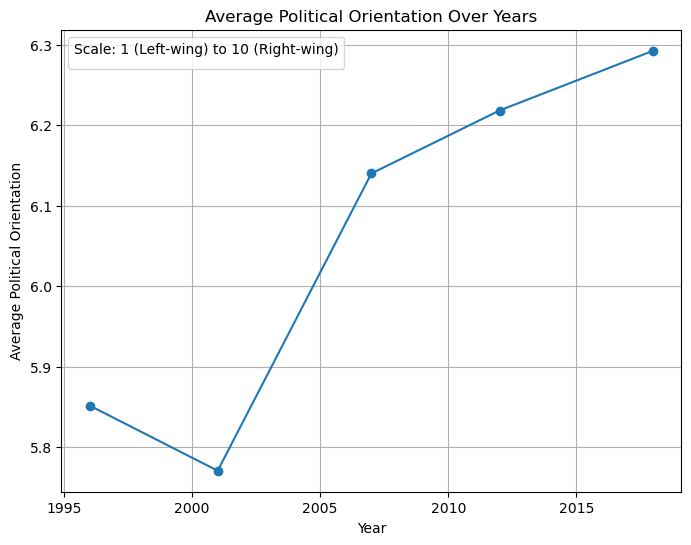

In [41]:
import matplotlib.pyplot as plt

# Convert 'political_scale' column to numeric
data_excluded_cells['political_scale'] = pd.to_numeric(data_excluded_cells['political_scale'], errors='coerce')

# Group by 'year_survey' and calculate the mean
yearly_political_scale = data_excluded_cells.groupby('year_survey')['political_scale'].mean()

plt.figure(figsize=(8, 6))
plt.plot(yearly_political_scale.index, yearly_political_scale.values, marker='o', linestyle='-')

plt.title('Average Political Orientation Over Years')
plt.xlabel('Year')
plt.ylabel('Average Political Orientation')
plt.grid(True)
plt.legend(title='Scale: 1 (Left-wing) to 10 (Right-wing)', loc='upper left')
plt.show()


#### Income Level
On this card is an income scale on which 1 indicates the lowest income group and 10 the highest income group in your country. We would like to know in what group your household is. Please, specify the appropriate number, counting all wages, salaries, pensions and other incomes that come in.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


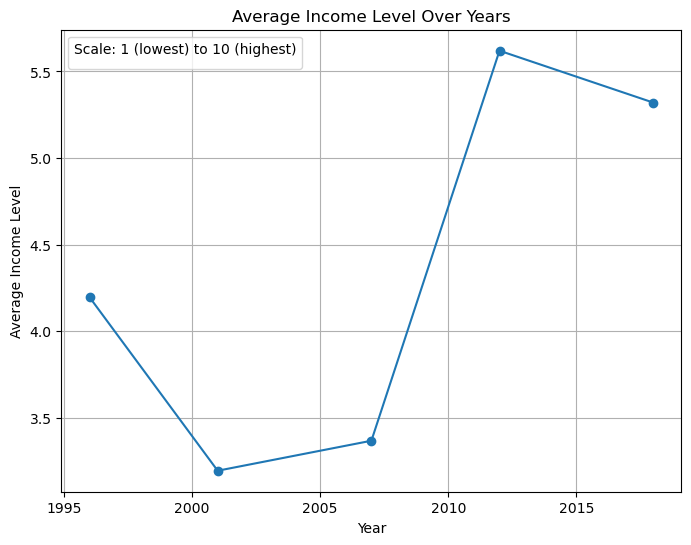

In [42]:
import matplotlib.pyplot as plt

yearly_income_scale = data_excluded_cells.groupby('year_survey')['income_scale'].mean()

plt.figure(figsize=(8, 6))
plt.plot(yearly_income_scale.index, yearly_income_scale.values, marker='o', linestyle='-')

plt.title('Average Income Level Over Years')
plt.xlabel('Year')
plt.ylabel('Average Income Level')
plt.grid(True)
plt.legend(title='Scale: 1 (lowest) to 10 (highest)', loc='upper left')
plt.show()

#### Confidence Levels Towards Government, Parliament and Political Parties

Relevant survey question is as follows: "I am going to name a number of organizations. For each one, could you tell me how much confidence you have in them: is it a great deal of confidence, quite a lot of confidence, not very much confidence or none at all?"

##### Confidence Towards Government

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


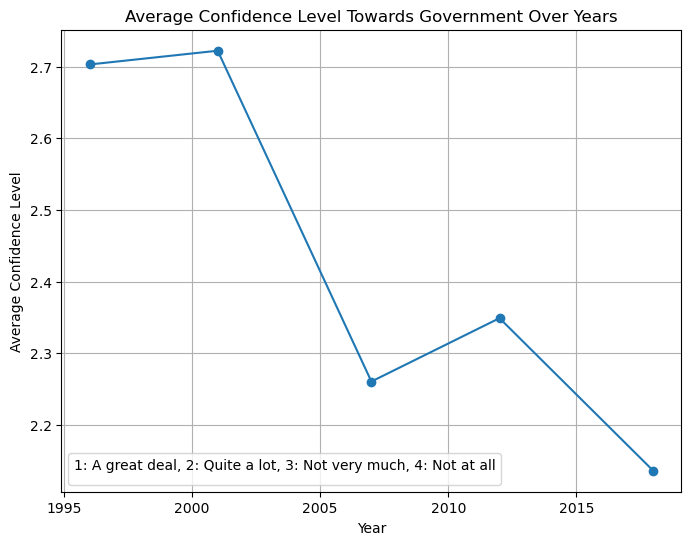

In [43]:
import matplotlib.pyplot as plt

yearly_confidence_level = data_excluded_cells.groupby('year_survey')['confidence_government'].mean()

plt.figure(figsize=(8, 6))
plt.plot(yearly_confidence_level.index, yearly_confidence_level.values, marker='o', linestyle='-')

plt.title('Average Confidence Level Towards Government Over Years')
plt.xlabel('Year')
plt.ylabel('Average Confidence Level')
plt.grid(True)
plt.legend(title='1: A great deal, 2: Quite a lot, 3: Not very much, 4: Not at all', loc='lower left')
plt.show()


##### Confidence Towards Parliament

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


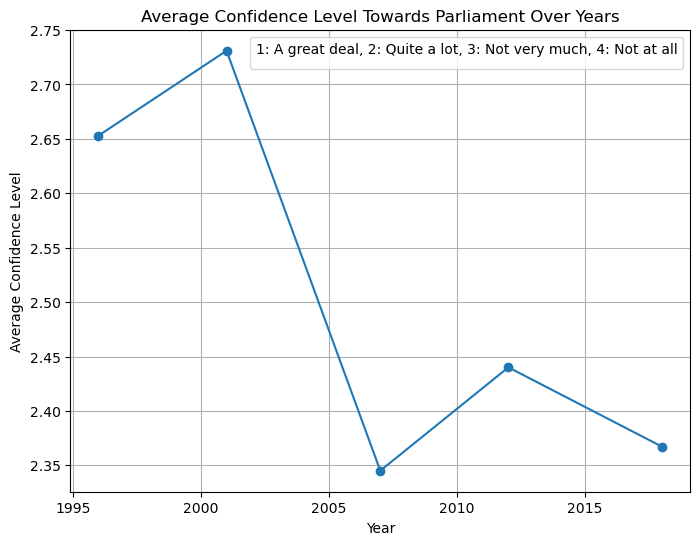

In [44]:
import matplotlib.pyplot as plt

yearly_confidence_level = data_excluded_cells.groupby('year_survey')['confidence_parliament'].mean()

plt.figure(figsize=(8, 6))
plt.plot(yearly_confidence_level.index, yearly_confidence_level.values, marker='o', linestyle='-')

plt.title('Average Confidence Level Towards Parliament Over Years')
plt.xlabel('Year')
plt.ylabel('Average Confidence Level')
plt.grid(True)
plt.legend(title='1: A great deal, 2: Quite a lot, 3: Not very much, 4: Not at all', loc='upper right')
plt.show()

##### Confidence Towards Political Parties

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


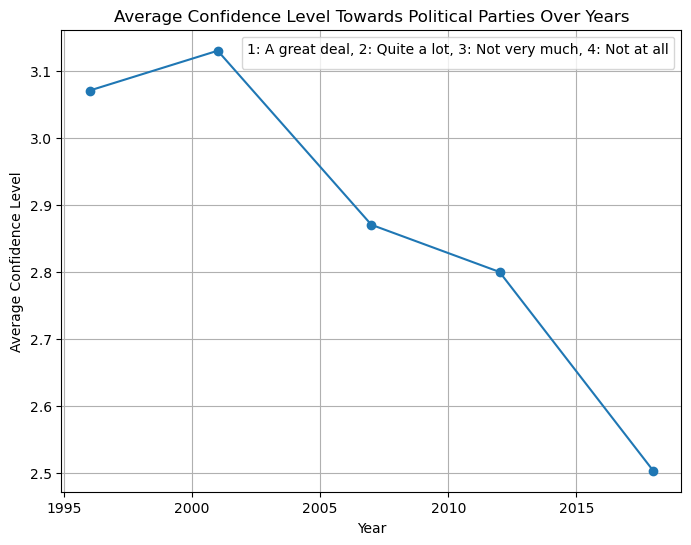

In [45]:
import matplotlib.pyplot as plt

yearly_confidence_level = data_excluded_cells.groupby('year_survey')['confidence_political_parties'].mean()

plt.figure(figsize=(8, 6))
plt.plot(yearly_confidence_level.index, yearly_confidence_level.values, marker='o', linestyle='-')

plt.title('Average Confidence Level Towards Political Parties Over Years')
plt.xlabel('Year')
plt.ylabel('Average Confidence Level')
plt.grid(True)
plt.legend(title='1: A great deal, 2: Quite a lot, 3: Not very much, 4: Not at all', loc='upper right')
plt.show()

#### Feeling Happy

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


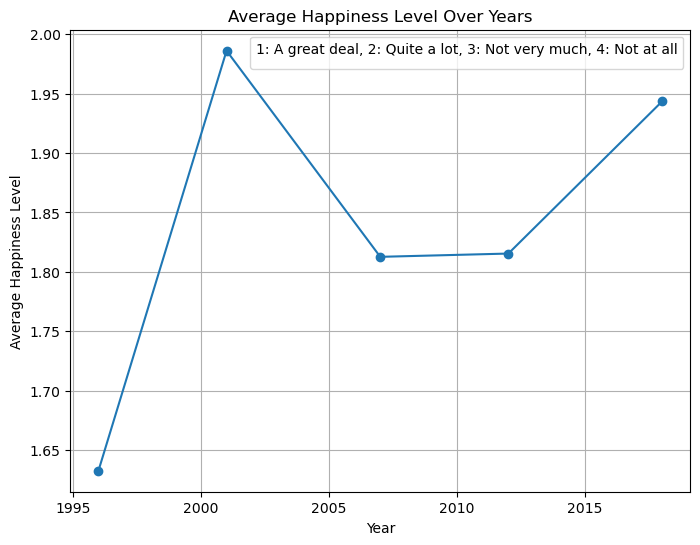

In [46]:
import matplotlib.pyplot as plt

yearly_happiness= data_excluded_cells.groupby('year_survey')['feeling_happy'].mean()

plt.figure(figsize=(8, 6))
plt.plot(yearly_happiness.index, yearly_happiness.values, marker='o', linestyle='-')

plt.title('Average Happiness Level Over Years')
plt.xlabel('Year')
plt.ylabel('Average Happiness Level')
plt.grid(True)
plt.legend(title='1: A great deal, 2: Quite a lot, 3: Not very much, 4: Not at all', loc='upper right')
plt.show()

#### Employment Status

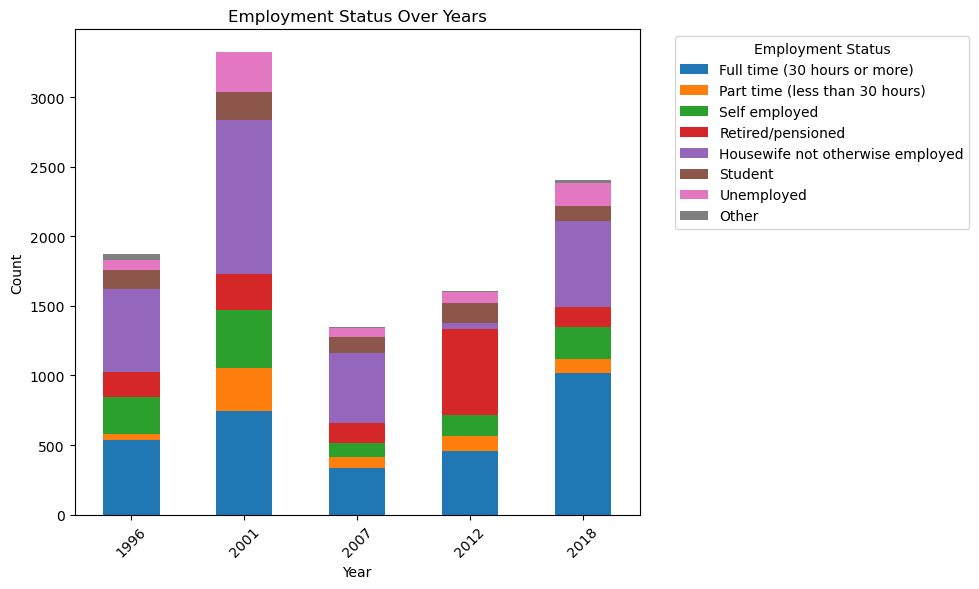

In [47]:
import matplotlib.pyplot as plt
import pandas as pd


# Define the mapping of employment status codes to their labels
employment_status_mapping = {
    1: 'Full time (30 hours or more)',
    2: 'Part time (less than 30 hours)',
    3: 'Self employed',
    4: 'Retired/pensioned',
    5: 'Housewife not otherwise employed',
    6: 'Student',
    7: 'Unemployed',
    8: 'Other'
}

# Group the data by 'year_survey' and 'employment_status' columns and count occurrences
employment_counts = consolidated_data_excluded_cells.groupby(['year_survey', 'employment_status']).size().unstack(fill_value=0)

# Rename the columns using the mapping
employment_counts.columns = [employment_status_mapping[col] for col in employment_counts.columns]

# Plotting the bar chart
ax = employment_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Employment Status Over Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Employment Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [48]:
data_excluded_cells.corr()

,importance_politics,feeling_happy,marital_status,interest_politics,political_scale,confidence_government,confidence_political_parties,confidence_parliament,having_strong_leaders,having_experts,having_army_rule,having_democratic_system,religious_group,religiosity,sex,age,employment_status,income_scale,year_survey
importance_politics,1.000000,-0.013083,0.030468,0.530454,0.035300,-0.012440,0.109769,-0.009560,-0.046906,-0.060789,-0.084573,0.039908,0.054005,-0.065803,0.104136,-0.044090,0.063403,-0.150075,-0.089233
feeling_happy,-0.013083,1.000000,0.067449,-0.020233,-0.098092,0.127641,0.083896,0.105566,0.014067,0.002037,0.060629,0.010517,0.023539,0.110440,-0.064913,0.004334,-0.005923,-0.066518,0.059971
marital_status,0.030468,0.067449,1.000000,0.020718,-0.064246,0.013452,0.015662,0.015582,0.011058,-0.035778,-0.012212,-0.029848,0.008152,0.082411,-0.068780,-0.391556,0.075235,0.028851,0.088309
interest_politics,0.530454,-0.020233,0.020718,1.000000,0.046624,-0.071242,0.069512,-0.033541,-0.058416,-0.053121,-0.100436,0.057995,0.067425,-0.099544,0.188288,-0.033383,0.106354,-0.193181,-0.025737
political_scale,0.035300,-0.098092,-0.064246,0.046624,1.000000,-0.281813,-0.147697,-0.194776,-0.116899,-0.016414,-0.070815,0.047543,0.089671,-0.280219,-0.016934,0.061820,0.013211,-0.040809,0.079351
confidence_government,-0.012440,0.127641,0.013452,-0.071242,-0.281813,1.000000,0.522231,0.623344,0.089623,-0.018220,0.163965,-0.022478,-0.092367,0.208412,-0.063588,-0.075482,-0.043612,0.023563,-0.221659
confidence_political_parties,0.109769,0.083896,0.015662,0.069512,-0.147697,0.522231,1.000000,0.569207,0.047895,-0.019292,0.093314,-0.012158,-0.071874,0.105729,-0.015829,-0.076713,-0.008597,-0.065267,-0.251281
confidence_parliament,-0.009560,0.105566,0.015582,-0.033541,-0.194776,0.623344,0.569207,1.000000,0.076420,-0.017605,0.122552,0.038298,-0.069000,0.156669,-0.037362,-0.074558,-0.018199,0.015358,-0.137617
having_strong_leaders,-0.046906,0.014067,0.011058,-0.058416,-0.116899,0.089623,0.047895,0.076420,1.000000,0.460421,0.228862,-0.073931,-0.123507,0.103592,-0.003794,0.011461,-0.030311,0.062178,-0.023764
having_experts,-0.060789,0.002037,-0.035778,-0.053121,-0.016414,-0.018220,-0.019292,-0.017605,0.460421,1.000000,0.192303,0.063989,-0.031451,0.033533,0.006163,0.027848,-0.018462,0.046408,0.074571


<Axes: >

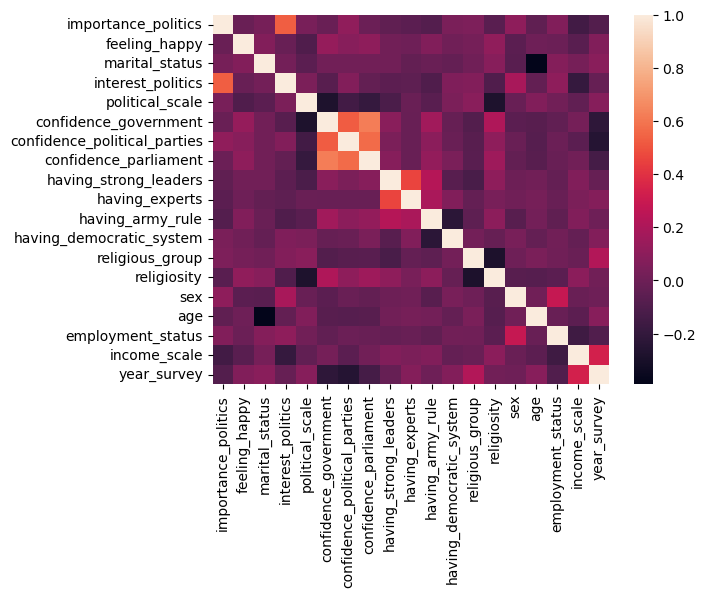

In [49]:
sns.heatmap(data_excluded_cells.corr())

## Regression Analysis 

In [50]:
import statsmodels.api as sm

This question serie is common among Konda and WVS dataset: "I'm going to describe various types of political systems and ask what you think about each as a way of governing this country. For each one, would you say it is a very good, fairly good, fairly bad or very bad way of governing this country?"

What do you think about:

1. Having a strong leader who does not have to bother with parliament and election?
2. Having experts, not government, make decisions according to what they think is best for the country?
3. Having the army rule?
4. Having a democratic political system?
5. Having a system governed by religious law in which there are no political parties or elections (Only this question is missing in mnay of the surveys. That's why it is not included in the regression analysis)

### Ideas about having a strong leader who does not have to bother with parliament and election?

In [51]:
import statsmodels.api as sm

y = data['having_strong_leaders']
X = data[['year_survey', 'confidence_government', 'importance_politics', 'feeling_happy', 'marital_status', 
       'political_scale', 'confidence_political_parties', 'confidence_parliament', 
       'having_experts', 'having_army_rule', 'having_democratic_system', 'religiosity', 'sex',
       'age', 'employment_status', 'income_scale']]
X = sm.add_constant(X)  # Adding a constant term for the intercept

model = sm.OLS(y, X, missing='drop')
model_result = model.fit()
print(model_result.summary())


                              OLS Regression Results                             
Dep. Variable:     having_strong_leaders   R-squared:                       0.426
Model:                               OLS   Adj. R-squared:                  0.425
Method:                    Least Squares   F-statistic:                     494.7
Date:                   Fri, 19 Jan 2024   Prob (F-statistic):               0.00
Time:                           13:19:32   Log-Likelihood:                -16088.
No. Observations:                  10674   AIC:                         3.221e+04
Df Residuals:                      10657   BIC:                         3.233e+04
Df Model:                             16                                         
Covariance Type:               nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

### Ideas about having a democratic political system

In [52]:
import statsmodels.api as sm

y = data['having_democratic_system']
X = data[['importance_politics', 'feeling_happy', 'marital_status',
       'political_scale', 'confidence_government',
       'confidence_political_parties', 'confidence_parliament',
       'having_strong_leaders', 'having_experts', 'having_army_rule',
       'religious_group', 'religiosity', 'sex',
       'age', 'employment_status', 'income_scale', 'year_survey']]
X = sm.add_constant(X)  # Adding a constant term for the intercept

model = sm.OLS(y, X, missing='drop')
model_result = model.fit()
print(model_result.summary())


                               OLS Regression Results                               
Dep. Variable:     having_democratic_system   R-squared:                       0.187
Model:                                  OLS   Adj. R-squared:                  0.185
Method:                       Least Squares   F-statistic:                     143.9
Date:                      Fri, 19 Jan 2024   Prob (F-statistic):               0.00
Time:                              13:19:32   Log-Likelihood:                -14184.
No. Observations:                     10674   AIC:                         2.840e+04
Df Residuals:                         10656   BIC:                         2.854e+04
Df Model:                                17                                         
Covariance Type:                  nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

### Ideas about having the army rule

In [53]:
import statsmodels.api as sm

y = data['having_army_rule']
X = data[['importance_politics', 'feeling_happy', 'marital_status',
       'political_scale', 'confidence_government',
       'confidence_political_parties', 'confidence_parliament',
       'having_strong_leaders', 'having_experts', 'having_democratic_system',
        'religiosity', 'sex',
       'age', 'employment_status', 'income_scale', 'year_survey']]
X = sm.add_constant(X)  # Adding a constant term for the intercept

model = sm.OLS(y, X, missing='drop')
model_result = model.fit()
print(model_result.summary())


                            OLS Regression Results                            
Dep. Variable:       having_army_rule   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     961.3
Date:                Fri, 19 Jan 2024   Prob (F-statistic):               0.00
Time:                        13:19:33   Log-Likelihood:                -23515.
No. Observations:               10674   AIC:                         4.706e+04
Df Residuals:                   10657   BIC:                         4.719e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

### Ideas about having experts, not government, make decisions according to what they think is best for the country?

In [54]:
import statsmodels.api as sm

y = data['having_experts']
X = data[['importance_politics', 'marital_status',
       'political_scale', 'confidence_government',
        'confidence_parliament',
       'having_strong_leaders', 'having_army_rule', 'having_democratic_system',
       'religious_group', 'religiosity', 'sex',
       'age', 'employment_status', 'income_scale', 'year_survey']]
X = sm.add_constant(X)  # Adding a constant term for the intercept

model = sm.OLS(y, X, missing='drop')
model_result = model.fit()
print(model_result.summary())

                            OLS Regression Results                            
Dep. Variable:         having_experts   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     570.1
Date:                Fri, 19 Jan 2024   Prob (F-statistic):               0.00
Time:                        13:19:34   Log-Likelihood:                -15289.
No. Observations:               10674   AIC:                         3.061e+04
Df Residuals:                   10658   BIC:                         3.073e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

### Religiosity and Political Scale Interaction

In [55]:
import statsmodels.api as sm

# Create the interaction term between 'religiosity' and 'political_scale'
data['religiosity_political_interaction'] = data['religiosity'] * data['political_scale']

# Define your dependent variable
y = data['having_democratic_system']

# Define your independent variables including the interaction term
X = data[['religiosity', 'political_scale', 'religiosity_political_interaction', 
                         'importance_politics', 'feeling_happy', 'marital_status', 
                         'confidence_government','confidence_political_parties', 
                         'confidence_parliament','having_army_rule','having_experts','having_strong_leaders',
                         'religious_group', 'sex', 'age', 
                         'employment_status', 'income_scale', 'year_survey']]

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X, missing='drop')
model_result = model.fit()
print(model_result.summary())

                               OLS Regression Results                               
Dep. Variable:     having_democratic_system   R-squared:                       0.189
Model:                                  OLS   Adj. R-squared:                  0.187
Method:                       Least Squares   F-statistic:                     137.8
Date:                      Fri, 19 Jan 2024   Prob (F-statistic):               0.00
Time:                              13:19:34   Log-Likelihood:                -14171.
No. Observations:                     10674   AIC:                         2.838e+04
Df Residuals:                         10655   BIC:                         2.852e+04
Df Model:                                18                                         
Covariance Type:                  nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------

### Sex and Age Interaction

In [56]:
import statsmodels.api as sm

# Create the interaction term between 'sex' and 'age'
data['sex_age_interaction'] = data['sex'] * data['age']

# Define your dependent variable
y = data['having_strong_leaders']

# Define your independent variables including the interaction term
X = data[['religiosity', 'political_scale', 'sex_age_interaction', 
                         'importance_politics', 'feeling_happy', 'marital_status', 
                         'confidence_government', 
                         'confidence_parliament','having_army_rule','having_experts','having_democratic_system',
                         'religious_group','sex', 'age', 
                         'employment_status', 'income_scale', 'year_survey' ]]

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X, missing='drop')
model_result = model.fit()
print(model_result.summary())

                              OLS Regression Results                             
Dep. Variable:     having_strong_leaders   R-squared:                       0.429
Model:                               OLS   Adj. R-squared:                  0.428
Method:                    Least Squares   F-statistic:                     470.1
Date:                   Fri, 19 Jan 2024   Prob (F-statistic):               0.00
Time:                           13:19:35   Log-Likelihood:                -16066.
No. Observations:                  10674   AIC:                         3.217e+04
Df Residuals:                      10656   BIC:                         3.230e+04
Df Model:                             17                                         
Covariance Type:               nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

Note: 

Male:1
Female:2

16-29 years: 1, 
30-49 years: 2, 
50 years and over: 3


### Sex and Age Interaction and Religiosity and Political Scale Interaction Applied Together

In [61]:
import statsmodels.api as sm

# Create the interaction term between 'sex' and 'age'
data['sex_age_interaction'] = data['sex'] * data['age']

# Define your dependent variable
y = data['having_strong_leaders']

# Define your independent variables including the interaction term
X = data[['religiosity', 'political_scale', 'sex_age_interaction', 'religiosity_political_interaction', 
                         'importance_politics', 'feeling_happy', 'marital_status', 
                         'confidence_government', 
                         'confidence_parliament','having_army_rule','having_experts','having_democratic_system',
                         'religious_group','sex', 'age', 
                         'employment_status', 'income_scale', 'year_survey' ]]

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X, missing='drop')
model_result = model.fit()
print(model_result.summary())

                              OLS Regression Results                             
Dep. Variable:     having_strong_leaders   R-squared:                       0.429
Model:                               OLS   Adj. R-squared:                  0.428
Method:                    Least Squares   F-statistic:                     443.9
Date:                   Fri, 19 Jan 2024   Prob (F-statistic):               0.00
Time:                           23:38:37   Log-Likelihood:                -16066.
No. Observations:                  10674   AIC:                         3.217e+04
Df Residuals:                      10655   BIC:                         3.231e+04
Df Model:                             18                                         
Covariance Type:               nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------